In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40


# FFT Model

# Dự đoán giá vàng

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from darts import TimeSeries
from darts.models import FFT
from darts.metrics import mae, mape, rmse, r2_score

Mounted at /content/drive


In [ ]:
df_gold = pd.read_csv('/content/drive/MyDrive/DataSet/New Dataset(01 06 2024)/gold_price_2018_2024.csv')
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.columns = ['Date', 'Price']

train_size = int(0.7 * len(df_gold))
test_size = len(df_gold) - train_size

train_data_gold = df_gold.iloc[:train_size]
test_data_gold = df_gold.iloc[train_size:]


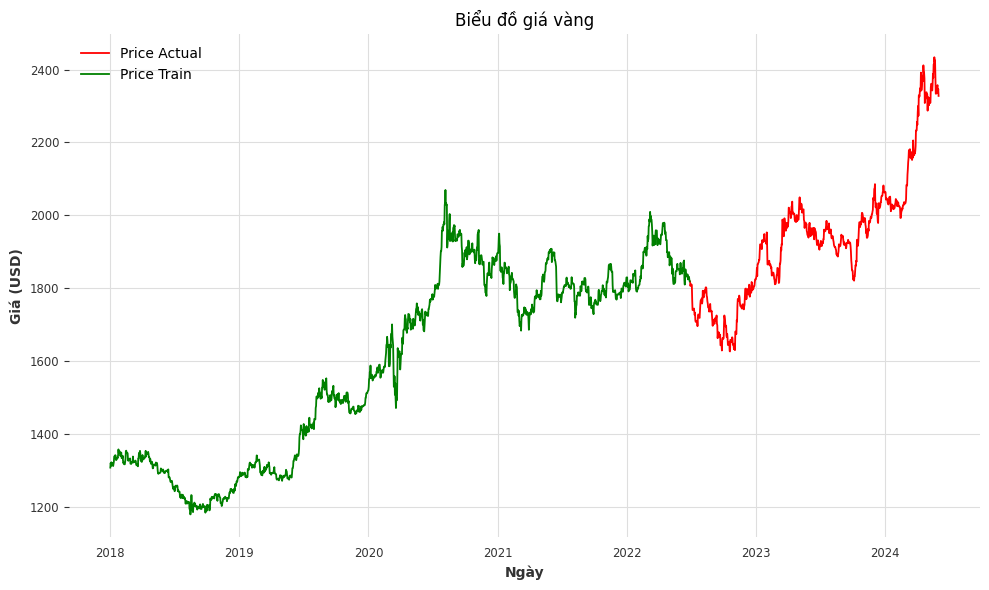

In [ ]:
plt.figure(figsize=(10, 6))

# plt.plot(test_data_gold['Day Number'], test_data_gold['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data_gold['Date'], test_data_gold['Price'], label='Price Actual', color='red')
plt.plot(train_data_gold['Date'], train_data_gold['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

In [ ]:
model = FFT(
    nr_freqs_to_keep=len(test_ts_gold),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))

# Dự đoán cho 30 ngày tiếp theo
model.fit(pred_gold)
pred_gold_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_gold_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_gold_90 = model.predict(90)

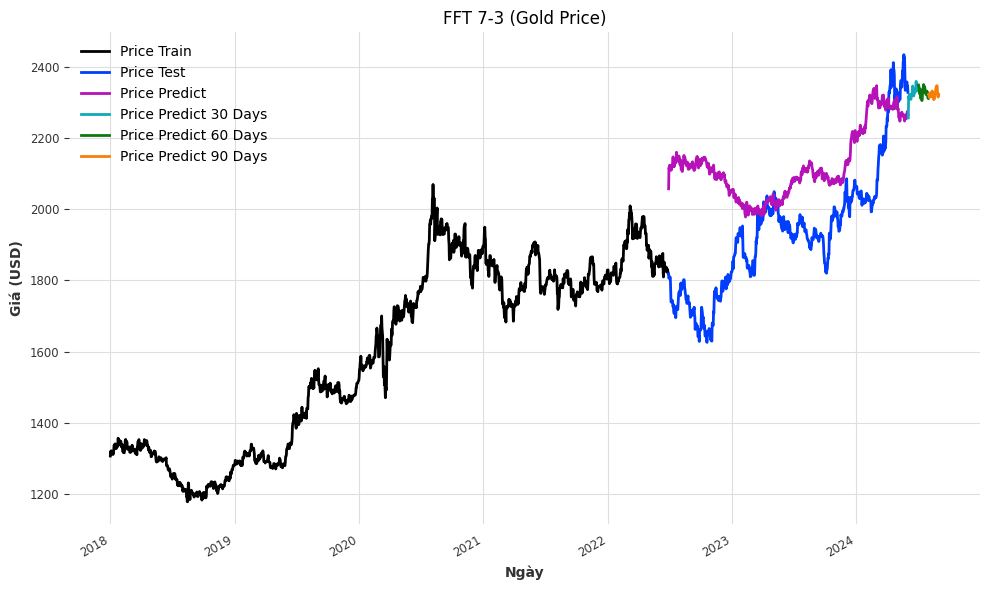

MAE: 195.71095431901614
MAPE: 9.193046113919188
RMSE: 236.7708426092495


In [ ]:
plt.figure(figsize=(10, 6))

train_ts_gold.plot(label='Price Train')
test_ts_gold.plot(label='Price Test')
pred_gold.plot(label='Price Predict')
pred_gold_30.plot(label='Price Predict 30 Days')
pred_gold_60[30:60].plot(label='Price Predict 60 Days')
pred_gold_90[60:90].plot(label='Price Predict 90 Days')


plt.title('FFT 7-3 (Gold Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))


Chia theo tỷ lệ 8:2


In [ ]:
train_size = int(0.8 * len(df_gold))
test_size = len(df_gold) - train_size

train_data_gold = df_gold.iloc[:train_size]
test_data_gold = df_gold.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

# Train model
model = FFT(
    nr_freqs_to_keep=len(test_ts_gold),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))


In [ ]:
# Dự đoán cho 30 ngày tiếp theo
model.fit(pred_gold)
pred_gold_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_gold_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_gold_90 = model.predict(90)

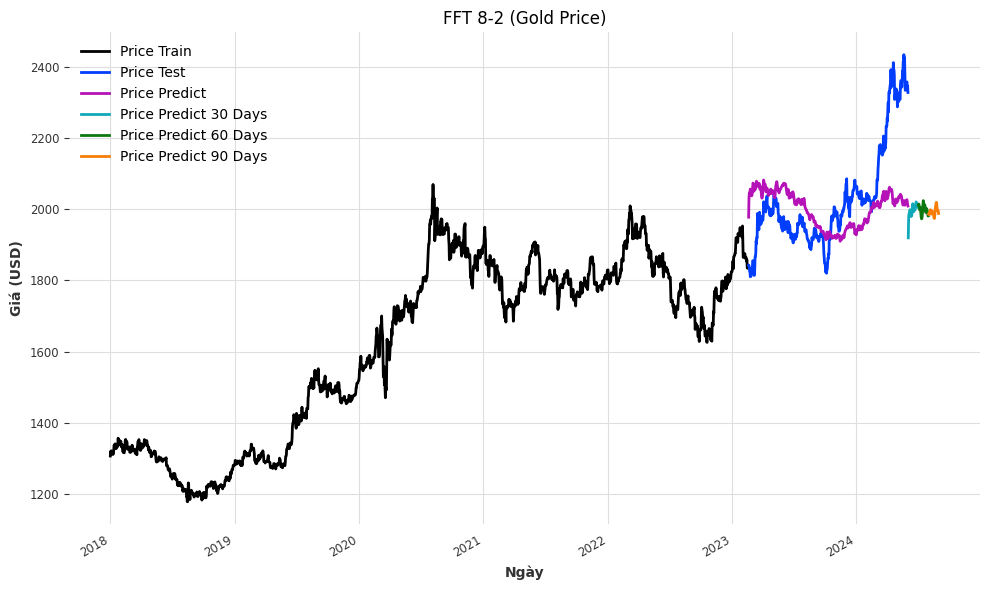

MAE: 111.26131437428188
MAPE: 5.522258032626495
RMSE: 145.0894001549515


In [ ]:
plt.figure(figsize=(10, 6))

train_ts_gold.plot(label='Price Train')
test_ts_gold.plot(label='Price Test')
pred_gold.plot(label='Price Predict')
pred_gold_30.plot(label='Price Predict 30 Days')
pred_gold_60[30:60].plot(label='Price Predict 60 Days')
pred_gold_90[60:90].plot(label='Price Predict 90 Days')


plt.title('FFT 8-2 (Gold Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))

Chia theo tỷ lệ 9:1

In [ ]:
train_size = int(0.9 * len(df_gold))
test_size = len(df_gold) - train_size

train_data_gold = df_gold.iloc[:train_size]
test_data_gold = df_gold.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

# Train model
model = FFT(
    nr_freqs_to_keep=len(test_ts_gold),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))

In [ ]:
# Dự đoán cho 30 ngày tiếp theo
model.fit(pred_gold)
pred_gold_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo

pred_gold_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo

pred_gold_90 = model.predict(90)

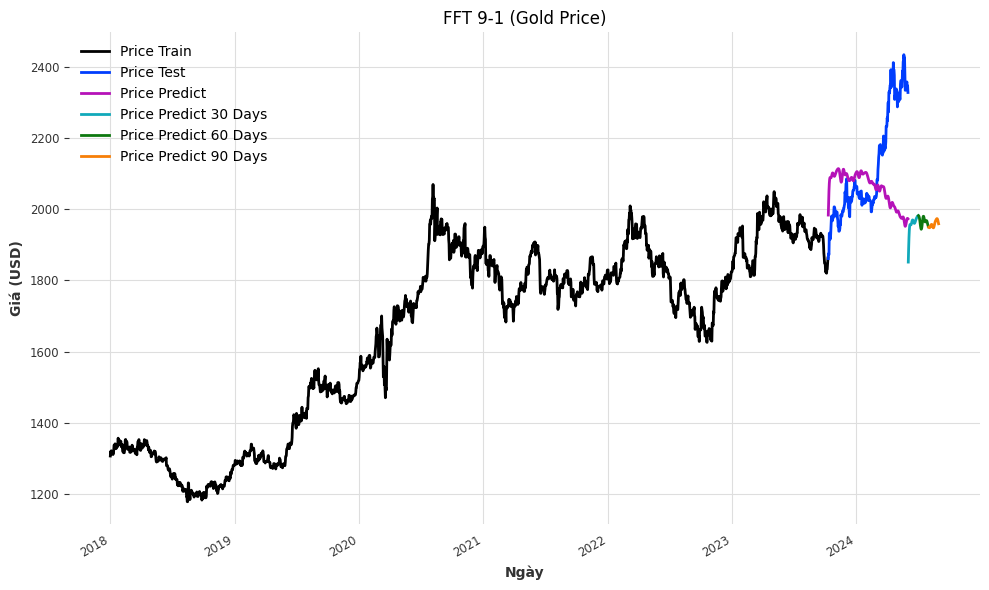

MAE: 154.40168525017876
MAPE: 7.620416797967953
RMSE: 199.51789359648657


In [ ]:
plt.figure(figsize=(10, 6))

train_ts_gold.plot(label='Price Train')
test_ts_gold.plot(label='Price Test')
pred_gold.plot(label='Price Predict')
pred_gold_30.plot(label='Price Predict 30 Days')
pred_gold_60[30:60].plot(label='Price Predict 60 Days')
pred_gold_90[60:90].plot(label='Price Predict 90 Days')


plt.title('FFT 9-1 (Gold Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))

# Dự đoán giá Platium

Tỷ lệ 7:3


In [ ]:
df_platium = pd.read_csv('/content/drive/MyDrive/DataSet/New Dataset(01 06 2024)/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium.columns = ['Date', 'Price']

train_size = int(0.7 * len(df_platium))
test_size = len(df_platium) - train_size

train_data_platium = df_platium.iloc[:train_size]
test_data_platium = df_platium.iloc[train_size:]


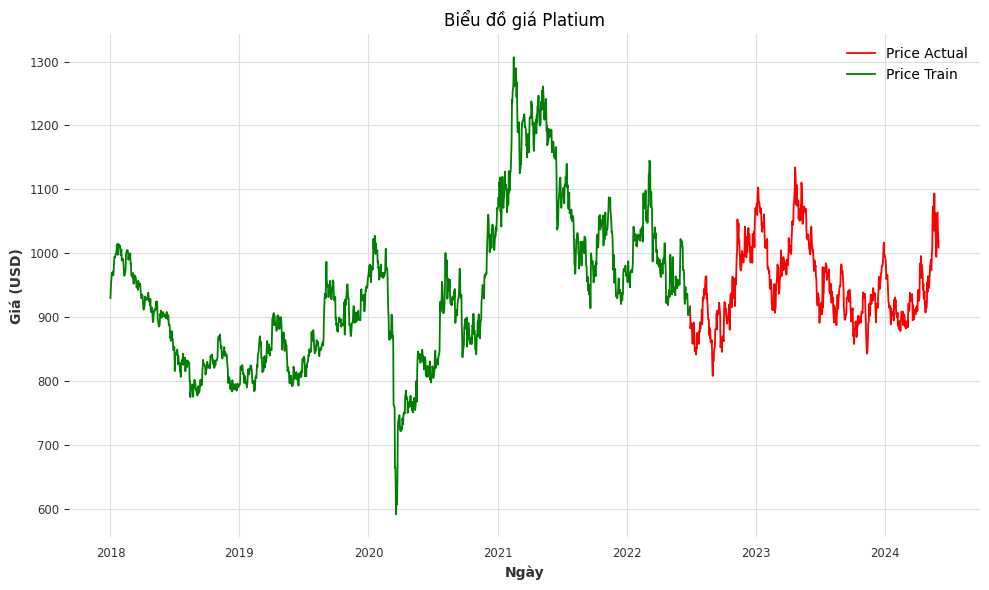

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(test_data_platium['Date'], test_data_platium['Price'], label='Price Actual', color='red')
plt.plot(train_data_platium['Date'], train_data_platium['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

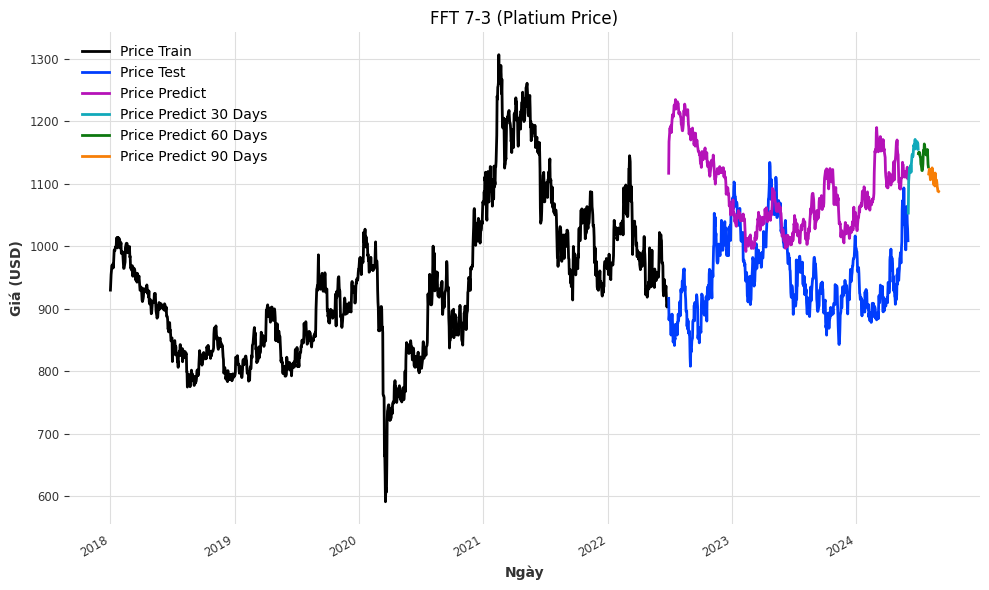

MAE: 139.80166759575587
MAPE: 12.486186686323329
RMSE: 170.07787733331193


In [ ]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_platium),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))
# Dự đoán cho 30 ngày tiếp theo
model.fit(pred_platium)
pred_platium_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo

pred_platium_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo

pred_platium_90 = model.predict(90)

plt.figure(figsize=(10, 6))

train_ts_platium.plot(label='Price Train')
test_ts_platium.plot(label='Price Test')
pred_platium.plot(label='Price Predict')
pred_platium_30.plot(label='Price Predict 30 Days')
pred_platium_60[30:60].plot(label='Price Predict 60 Days')
pred_platium_90[60:90].plot(label='Price Predict 90 Days')

plt.title('FFT 7-3 (Platium Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(test_ts_platium, pred_platium))


Chia theo tỷ lệ 8:2


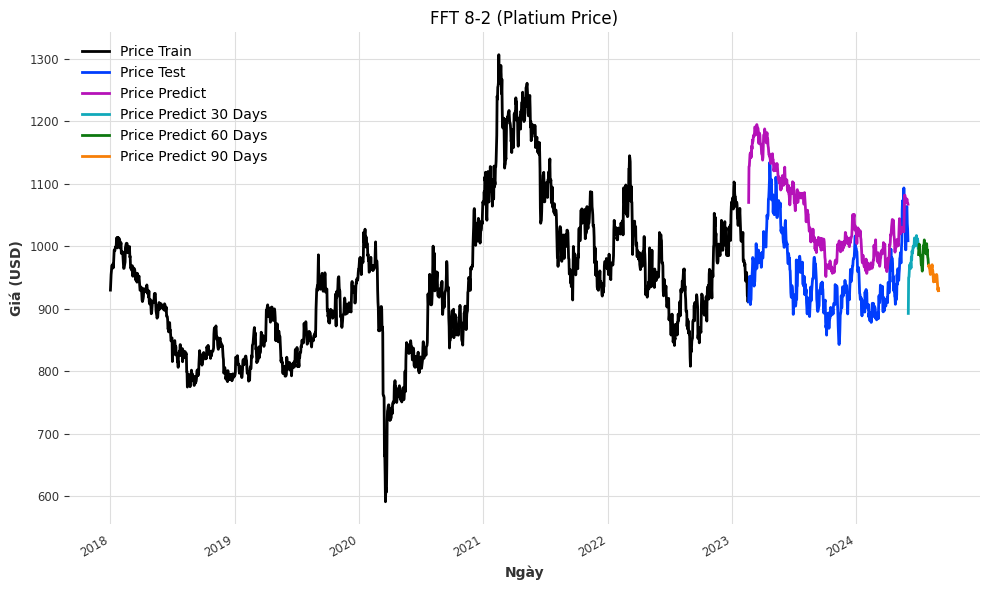

MAE: 93.3287644730421
MAPE: 8.791822869222436
RMSE: 105.92611269558377


In [ ]:
train_size = int(0.8 * len(df_platium))
test_size = len(df_platium) - train_size

train_data_platium = df_platium.iloc[:train_size]
test_data_platium = df_platium.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

# Train model

model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))
model.fit(pred_platium)
# Dự đoán cho 30 ngày tiếp theo
pred_platium_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_platium_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_platium_90 = model.predict(90)

plt.figure(figsize=(10, 6))

train_ts_platium.plot(label='Price Train')
test_ts_platium.plot(label='Price Test')
pred_platium.plot(label='Price Predict')
pred_platium_30.plot(label='Price Predict 30 Days')
pred_platium_60[30:60].plot(label='Price Predict 60 Days')
pred_platium_90[60:90].plot(label='Price Predict 90 Days')


plt.title('FFT 8-2 (Platium Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(pred_platium, test_ts_platium))

Chia theo tỷ lệ 9:1

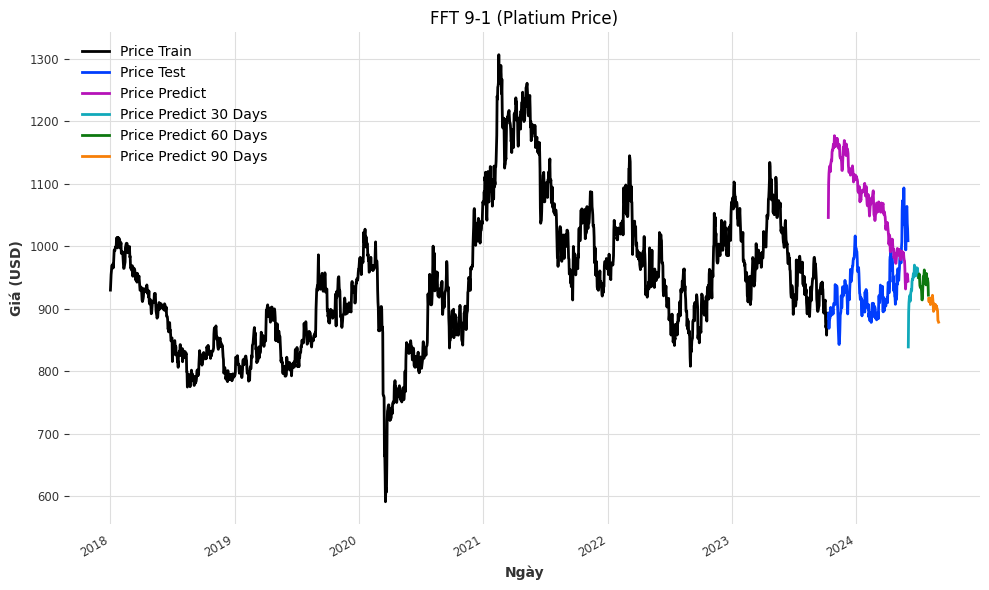

MAE: 152.11814730072223
MAPE: 13.867568554163867
RMSE: 168.5407327215657


In [ ]:
train_size = int(0.9 * len(df_platium))
test_size = len(df_platium) - train_size

train_data_platium = df_platium.iloc[:train_size]
test_data_platium = df_platium.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

# Train model

model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))
model.fit(pred_platium)
# Dự đoán cho 30 ngày tiếp theo
pred_platium_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_platium_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_platium_90 = model.predict(90)

plt.figure(figsize=(10, 6))

train_ts_platium.plot(label='Price Train')
test_ts_platium.plot(label='Price Test')
pred_platium.plot(label='Price Predict')
pred_platium_30.plot(label='Price Predict 30 Days')
pred_platium_60[30:60].plot(label='Price Predict 60 Days')
pred_platium_90[60:90].plot(label='Price Predict 90 Days')


plt.title('FFT 9-1 (Platium Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(pred_platium, test_ts_platium))

# Dự đoán giá bạc

Tỷ lệ 7:3

In [ ]:
df_silver = pd.read_csv('/content/drive/MyDrive/DataSet/New Dataset(01 06 2024)/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver.columns = ['Date', 'Price']

train_size = int(0.7 * len(df_silver))
test_size = len(df_silver) - train_size

train_data_silver = df_silver.iloc[:train_size]
test_data_silver = df_silver.iloc[train_size:]


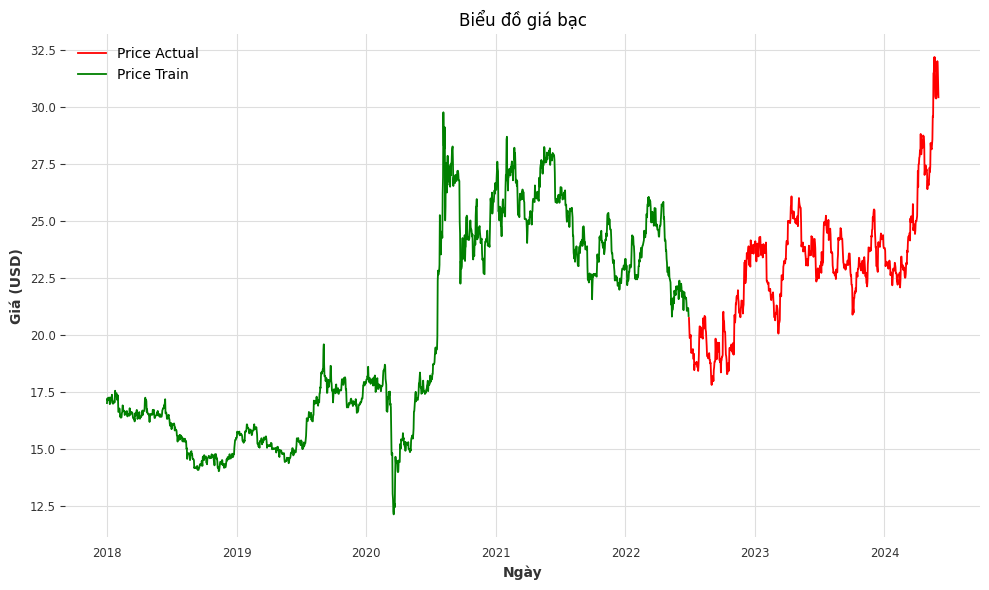

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(test_data_silver['Date'], test_data_silver['Price'], label='Price Actual', color='red')
plt.plot(train_data_silver['Date'], train_data_silver['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

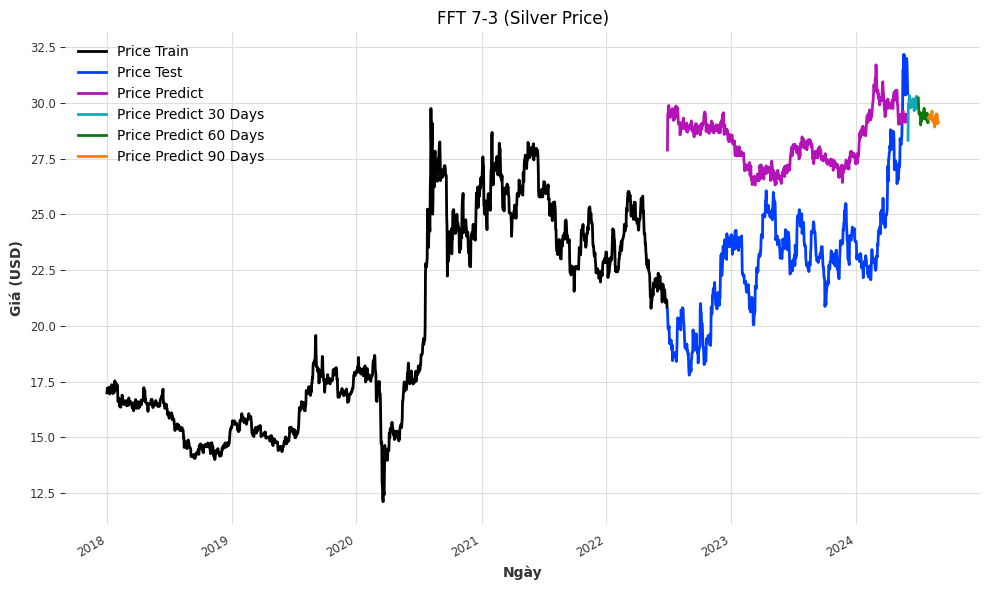

MAE: 5.325847172219942
MAPE: 18.69670064298477
RMSE: 5.9443976045079205


In [ ]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_silver),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))
model.fit(pred_silver)

# Dự đoán cho 30 ngày tiếp theo
pred_silver_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_silver_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_silver_90 = model.predict(90)

plt.figure(figsize=(10, 6))


train_ts_silver.plot(label='Price Train')
test_ts_silver.plot(label='Price Test')
pred_silver.plot(label='Price Predict')
pred_silver_30.plot(label='Price Predict 30 Days')
pred_silver_60[30:60].plot(label='Price Predict 60 Days')
pred_silver_90[60:90].plot(label='Price Predict 90 Days')

plt.title('FFT 7-3 (Silver Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))
print("RMSE:", rmse(pred_silver, test_ts_silver))

Chia theo tỷ lệ 8:2

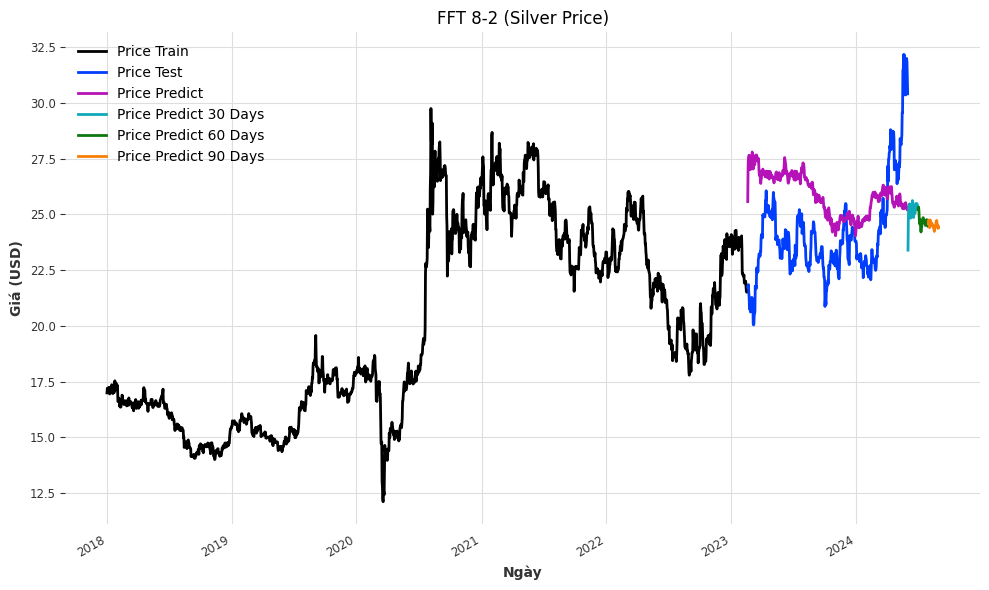

MAE: 2.555698750611863
MAPE: 9.780779277937459
RMSE: 2.9651439536203292


In [ ]:
train_size = int(0.8 * len(df_silver))
test_size = len(df_silver) - train_size

train_data_silver = df_silver.iloc[:train_size]
test_data_silver = df_silver.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_silver),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))
model.fit(pred_silver)

# Dự đoán cho 30 ngày tiếp theo
pred_silver_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_silver_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_silver_90 = model.predict(90)

plt.figure(figsize=(10, 6))


train_ts_silver.plot(label='Price Train')
test_ts_silver.plot(label='Price Test')
pred_silver.plot(label='Price Predict')
pred_silver_30.plot(label='Price Predict 30 Days')
pred_silver_60[30:60].plot(label='Price Predict 60 Days')
pred_silver_90[60:90].plot(label='Price Predict 90 Days')

plt.title('FFT 8-2 (Silver Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))
print("RMSE:", rmse(pred_silver, test_ts_silver))

Chia theo tỷ lệ 9:1

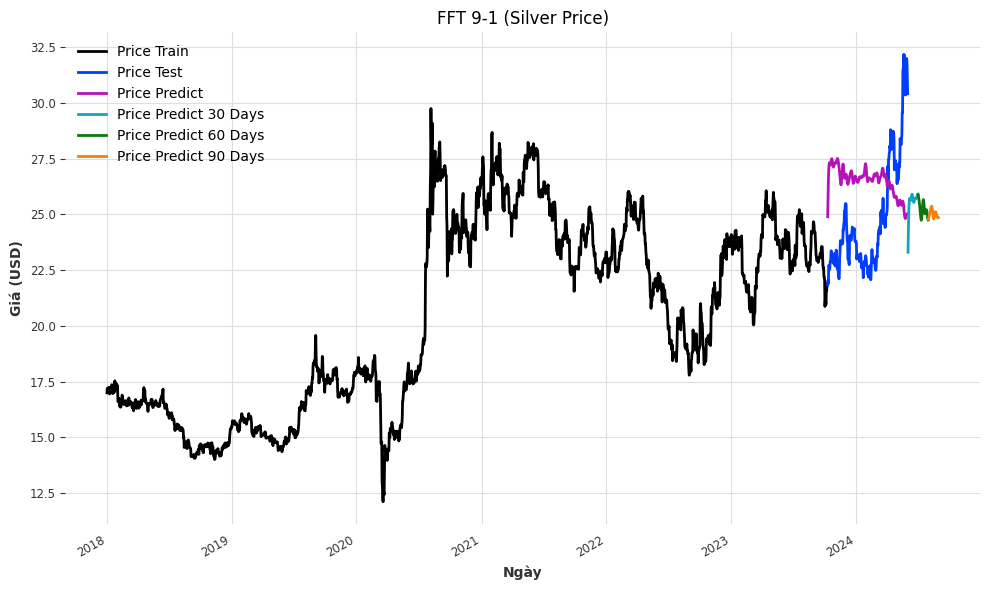

MAE: 3.2090922017304044
MAPE: 12.117496174945135
RMSE: 3.477975711823137


In [ ]:
train_size = int(0.9 * len(df_silver))
test_size = len(df_silver) - train_size

train_data_silver = df_silver.iloc[:train_size]
test_data_silver = df_silver.iloc[train_size:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_silver),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))
model.fit(pred_silver)

# Dự đoán cho 30 ngày tiếp theo
pred_silver_30 = model.predict(30)

# Dự đoán cho 60 ngày tiếp theo
pred_silver_60 = model.predict(60)

# Dự đoán cho 90 ngày tiếp theo
pred_silver_90 = model.predict(90)

plt.figure(figsize=(10, 6))


train_ts_silver.plot(label='Price Train')
test_ts_silver.plot(label='Price Test')
pred_silver.plot(label='Price Predict')
pred_silver_30.plot(label='Price Predict 30 Days')
pred_silver_60[30:60].plot(label='Price Predict 60 Days')
pred_silver_90[60:90].plot(label='Price Predict 90 Days')

plt.title('FFT 9-1 (Silver Price)')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))
print("RMSE:", rmse(pred_silver, test_ts_silver))